# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

-0.002
-0.003
-0.005
-0.002
-0.002
-0.003
-0.005
-0.003
-0.003
-0.003
-0.004
-0.004
-0.003
-0.003
-0.004
-0.004
-0.004
-0.004
-0.003
-0.003
-0.007
-0.003
-0.003
-0.006
-0.006
-0.003
0.994
0.994
0.994
0.993
1.991
1.991
1.993
1.992
1.989
3.975
3.976
3.978
3.976
3.976
4.979
4.975
4.977
4.978
5.977
5.978
5.981
5.981
5.984
6.855
6.854
7.718
7.715
8.709
8.712
8.714
9.712
9.718
9.714
9.716
10.714
10.715
11.713
11.712
11.712
11.716
13.71
13.71
13.713
13.71
14.668
14.668
14.666
14.665
14.667
15.624
15.622
15.623
16.617
16.618
17.616
17.613
17.614
17.614
18.612
18.61
18.609
19.604
19.607
19.608
20.609
20.609
21.601
21.601
22.33
22.33
22.328
23.049
23.05
24.049
24.049
24.05
24.047
25.048
25.047
25.05
25.05
26.049
26.045
26.047
26.047
27.045
27.044
27.044
27.041
28.049
28.046
28.047
28.045
29.041
29.045
29.046
29.046
31.611
31.61
31.608
31.609
32.606
32.607
32.606
33.604
33.603
33.604
34.603
34.605
34.605
34.607
34.607
35.607
35.605
35.603
36.602
36.602
36.602
36.603
37.47
37.472
37.469
37.467
38.

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,-0.002
1,2,-0.003
2,4,-0.005
3,6,-0.002
4,8,-0.002
...,...,...
1107,2214,59.379
1108,2216,59.375
1109,2218,59.375
1110,2220,59.375


<IPython.core.display.Javascript object>


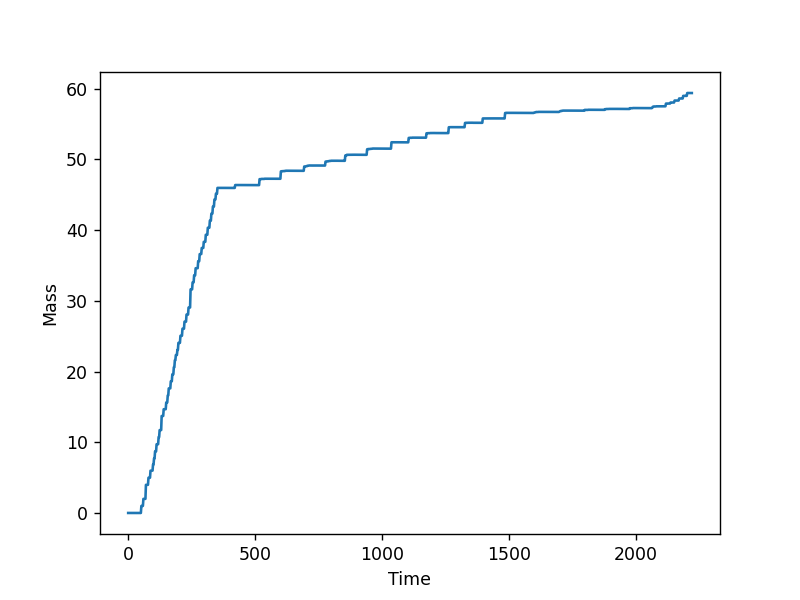

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_250423_S355-360.csv')